# **Intel Unnati**

# Smart Mobile Phone Price Prediction using Machine Learning

In [117]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [118]:
#importing and loading datasets
train_data=pd.read_csv("train.csv")
test_data=pd.read_csv("test.csv")

In [119]:
train_data


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,0


In [120]:
test_data


,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w
0,1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7
1,2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10
3,4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,7,17,644,913,2121,14,8
996,997,609,0,1.8,1,0,0,13,0.9,186,4,2,1152,1632,1933,8,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,1,12,477,825,1223,5,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,2,12,38,832,2509,15,11



# Exploratory Data Analysis

In [121]:
train_data.shape

(2000, 17)

In [122]:
test_data.shape

(1000, 17)

In [123]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  price_range    2000 non-null   int64  
dtypes: float64(2), int64(15)
memory usage: 265.8 KB


In [124]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
dtypes: float64(2), int64(15)
memory usage: 132.9 KB


In [125]:
print(train_data.isnull().sum())

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
price_range      0
dtype: int64


In [126]:
test_data.isnull().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
dtype: int64

In [127]:
train_data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,3.000000


In [128]:
test_data.describe()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,1248.510000,0.516000,1.540900,0.517000,4.593000,0.487000,33.652000,0.517500,139.51100,4.328000,10.054000,627.121000,1239.774000,2138.998000,11.995000,5.316000
std,288.819436,432.458227,0.499994,0.829268,0.499961,4.463325,0.500081,18.128694,0.280861,34.85155,2.288155,6.095099,432.929699,439.670981,1088.092278,4.320607,4.240062
min,1.000000,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.00000,1.000000,0.000000,0.000000,501.000000,263.000000,5.000000,0.000000
25%,250.750000,895.000000,0.000000,0.700000,0.000000,1.000000,0.000000,18.000000,0.300000,109.75000,2.000000,5.000000,263.750000,831.750000,1237.250000,8.000000,2.000000
50%,500.500000,1246.500000,1.000000,1.500000,1.000000,3.000000,0.000000,34.500000,0.500000,139.00000,4.000000,10.000000,564.500000,1250.000000,2153.500000,12.000000,5.000000
75%,750.250000,1629.250000,1.000000,2.300000,1.000000,7.000000,1.000000,49.000000,0.800000,170.00000,6.000000,16.000000,903.000000,1637.750000,3065.500000,16.000000,8.000000
max,1000.000000,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.00000,8.000000,20.000000,1907.000000,1998.000000,3989.000000,19.000000,18.000000


In [129]:
#compare train and test dataset
compare= {'features':['battery_power', 'clock_speed', 'fc', 'int_memory', 'mobile_wt', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w'],
          'train_mean':[train_data.battery_power.mean(),train_data.clock_speed.mean(), train_data.fc.mean()
                       ,train_data.int_memory.mean(),train_data.mobile_wt.mean(),train_data.pc.mean(),
                       train_data.px_height.mean(),train_data.px_width.mean(),train_data.ram.mean(),train_data.sc_h.mean(),
                       train_data.sc_w.mean()],
          'test_mean': [test_data.battery_power.mean(),test_data.clock_speed.mean(), test_data.fc.mean()
                       ,test_data.int_memory.mean(),test_data.mobile_wt.mean(),test_data.pc.mean(),
                       test_data.px_height.mean(),test_data.px_width.mean(),test_data.ram.mean(),test_data.sc_h.mean(),
                       test_data.sc_w.mean()]}
comparison = pd.DataFrame(compare)
comparison

,features,train_mean,test_mean
0,battery_power,1238.51850,1248.5100
1,clock_speed,1.52225,1.5409
2,fc,4.30950,4.5930
3,int_memory,32.04650,33.6520
4,mobile_wt,140.24900,139.5110
5,pc,9.91650,10.0540
6,px_height,645.10800,627.1210
7,px_width,1251.51550,1239.7740
8,ram,2124.21300,2138.9980
9,sc_h,12.30650,11.9950


<Axes: >

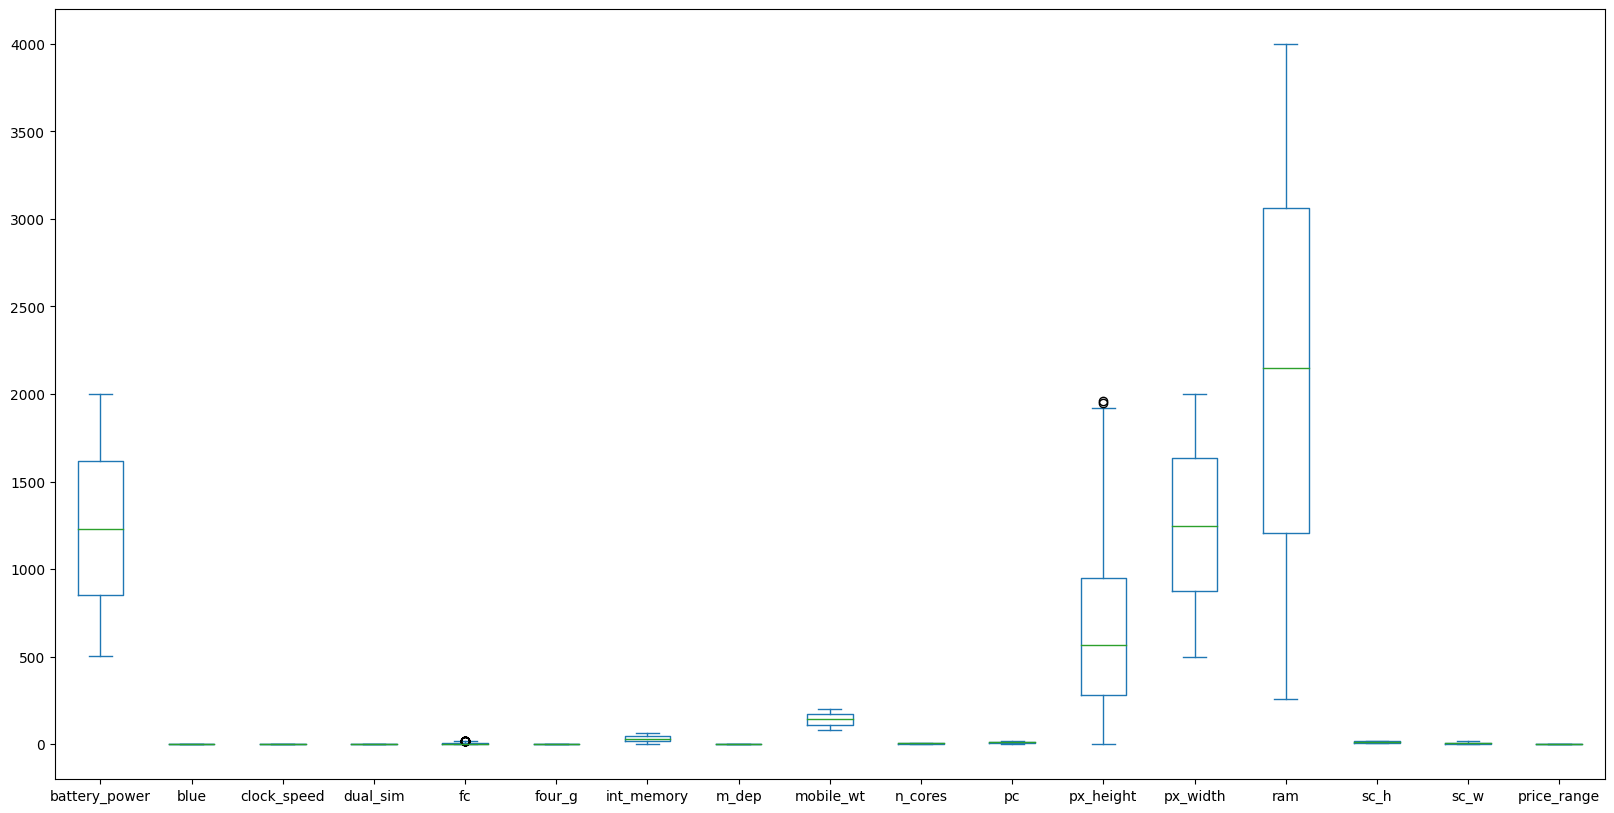

In [130]:
#visualization categorical and numerical data
train_data.plot(kind='box',figsize=(20,10))

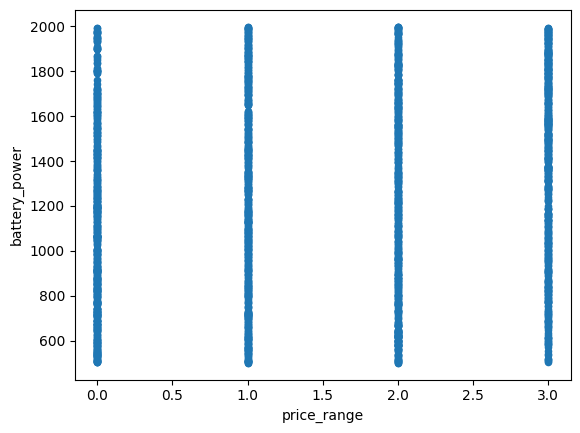

In [131]:
train_data.plot(x='price_range',y='battery_power',kind='scatter')
plt.show()

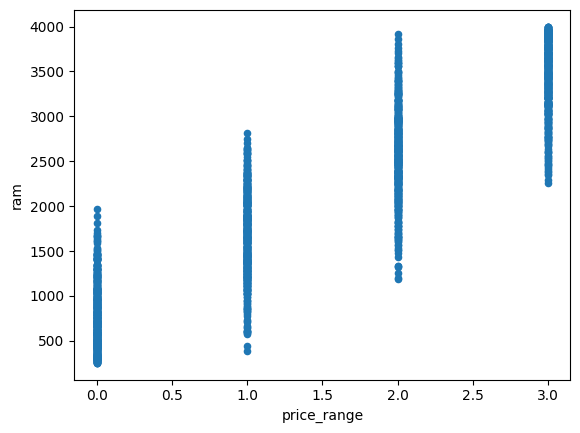

In [132]:
train_data.plot(x='price_range',y='ram',kind='scatter')
plt.show()

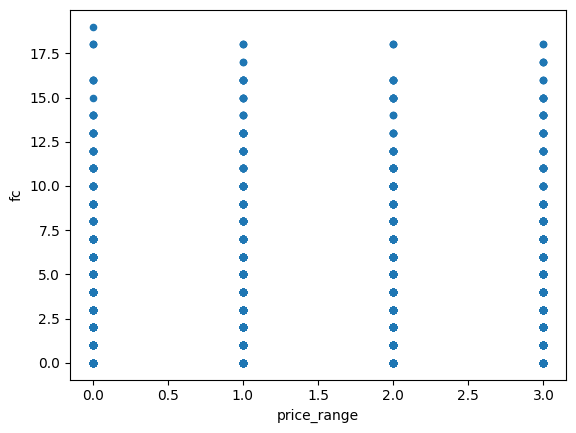

In [133]:
train_data.plot(x='price_range',y='fc',kind='scatter')
plt.show()

In [134]:
price_range = train_data["price_range"].value_counts()
fig = px.bar(price_range, y = 'price_range', text = 'price_range',
             color = ["0","1","2","3"])
fig.update_layout(title = "Price Range", showlegend = False,
                 xaxis = dict(zeroline = False, tickmode = 'linear', tick0 = 0, dtick = 1 ),
                 autosize=False,
                 width=700,
                 height=450,
                 xaxis_title_text = 'Price Range',
                 yaxis_title_text = 'Frequency')
fig.show()

# Training and Testing the Model

In [135]:
X=train_data.drop('price_range',axis=1)
Y=train_data['price_range']

In [136]:
Y=train_data['price_range']
Y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

In [137]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [138]:
X_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w
582,1232,0,2.9,1,1,1,24,0.3,169,5,17,361,809,1257,16,10
159,1840,0,0.5,1,12,0,34,0.7,142,1,16,311,1545,1078,8,0
1827,1692,0,2.1,0,4,1,2,0.9,106,1,17,1899,1904,3779,9,3
318,508,0,0.8,0,7,1,42,0.3,94,1,8,39,557,663,13,12
708,977,1,2.8,1,2,0,35,0.6,165,2,15,1502,1862,3714,19,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,1224,1,1.6,0,9,0,33,1.0,157,1,18,522,563,3796,10,5
1216,1158,0,0.7,1,1,1,29,0.7,123,2,20,311,1796,1542,17,9
1653,1190,0,2.0,1,0,0,40,0.2,93,5,1,1399,1646,3610,13,7
559,1191,0,2.4,1,2,0,13,0.9,169,1,7,179,1813,1028,14,6


In [139]:
X_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w
405,1454,1,0.5,1,1,0,34,0.7,83,4,3,250,1033,3419,7,5
1190,1092,1,0.5,1,10,0,11,0.5,167,3,14,468,571,737,14,4
1132,1524,1,1.8,1,0,0,10,0.6,174,4,1,154,550,2678,16,5
731,1807,1,2.1,0,2,0,49,0.8,125,1,10,337,1384,1906,17,13
1754,1086,1,1.7,1,0,1,43,0.2,111,6,1,56,1150,3285,11,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638,955,0,0.5,1,4,0,43,0.9,143,5,8,1248,1511,1432,12,9
360,809,0,0.8,0,10,0,21,0.9,91,7,19,1453,1726,1274,18,7
1810,594,1,2.6,0,1,0,27,0.1,196,5,2,407,528,708,17,5
1743,1673,1,1.6,0,2,0,42,0.5,182,5,6,214,679,3094,12,4


In [140]:
Y_train

582     0
159     1
1827    3
318     0
708     3
       ..
835     3
1216    1
1653    3
559     0
684     1
Name: price_range, Length: 1600, dtype: int64

In [141]:
Y_test

405     3
1190    0
1132    2
731     2
1754    2
       ..
638     1
360     1
1810    0
1743    2
563     1
Name: price_range, Length: 400, dtype: int64

In [142]:
model = LinearRegression()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(Y_test, y_pred)
print("Mean Squared Error:", mse)
mae = mean_absolute_error(Y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Squared Error: 0.10140787143182366
Mean Absolute Error: 0.2751459202791419


# Model selection and predicting Accuracy with different Algorithms

# 1) Decision Tree Algorithm

In [143]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()

In [144]:
DT.fit(X_train,Y_train)
Y_pred=DT.predict(X_test)
Y_pred

array([3, 0, 2, 2, 3, 0, 0, 3, 3, 1, 0, 3, 0, 2, 3, 0, 3, 2, 2, 1, 0, 0,
       3, 1, 2, 2, 3, 1, 3, 1, 1, 0, 2, 0, 2, 3, 0, 0, 3, 3, 3, 2, 3, 2,
       1, 3, 0, 1, 2, 1, 0, 3, 0, 2, 0, 2, 3, 1, 0, 3, 3, 1, 3, 2, 2, 2,
       3, 2, 2, 2, 3, 2, 1, 0, 1, 3, 2, 2, 1, 1, 3, 3, 2, 0, 0, 0, 2, 1,
       2, 3, 1, 2, 3, 0, 0, 2, 3, 3, 0, 3, 1, 1, 3, 1, 3, 2, 2, 2, 2, 3,
       3, 0, 0, 1, 2, 3, 0, 2, 1, 0, 1, 3, 2, 2, 2, 1, 1, 1, 0, 3, 0, 3,
       2, 3, 3, 3, 3, 1, 0, 1, 1, 2, 2, 3, 0, 2, 0, 0, 2, 0, 2, 1, 1, 1,
       3, 0, 0, 3, 1, 3, 2, 1, 3, 1, 2, 3, 3, 2, 1, 0, 3, 2, 2, 3, 3, 0,
       2, 2, 3, 0, 3, 1, 0, 1, 3, 1, 3, 0, 2, 3, 1, 1, 0, 3, 3, 0, 1, 3,
       1, 0, 3, 3, 3, 1, 2, 3, 2, 3, 0, 0, 0, 2, 3, 3, 0, 0, 1, 3, 2, 3,
       3, 3, 0, 0, 2, 3, 3, 2, 0, 2, 0, 0, 0, 3, 3, 0, 2, 2, 0, 1, 0, 2,
       3, 3, 0, 0, 1, 3, 3, 1, 3, 0, 3, 1, 1, 0, 2, 3, 3, 2, 0, 0, 1, 2,
       3, 2, 2, 3, 2, 1, 1, 3, 3, 2, 1, 3, 3, 2, 2, 1, 0, 2, 1, 0, 0, 0,
       2, 2, 2, 2, 0, 2, 3, 0, 1, 3, 3, 0, 2, 0, 1,

In [145]:
Y_pred=DT.predict(X_test)
Y_pred

array([3, 0, 2, 2, 3, 0, 0, 3, 3, 1, 0, 3, 0, 2, 3, 0, 3, 2, 2, 1, 0, 0,
       3, 1, 2, 2, 3, 1, 3, 1, 1, 0, 2, 0, 2, 3, 0, 0, 3, 3, 3, 2, 3, 2,
       1, 3, 0, 1, 2, 1, 0, 3, 0, 2, 0, 2, 3, 1, 0, 3, 3, 1, 3, 2, 2, 2,
       3, 2, 2, 2, 3, 2, 1, 0, 1, 3, 2, 2, 1, 1, 3, 3, 2, 0, 0, 0, 2, 1,
       2, 3, 1, 2, 3, 0, 0, 2, 3, 3, 0, 3, 1, 1, 3, 1, 3, 2, 2, 2, 2, 3,
       3, 0, 0, 1, 2, 3, 0, 2, 1, 0, 1, 3, 2, 2, 2, 1, 1, 1, 0, 3, 0, 3,
       2, 3, 3, 3, 3, 1, 0, 1, 1, 2, 2, 3, 0, 2, 0, 0, 2, 0, 2, 1, 1, 1,
       3, 0, 0, 3, 1, 3, 2, 1, 3, 1, 2, 3, 3, 2, 1, 0, 3, 2, 2, 3, 3, 0,
       2, 2, 3, 0, 3, 1, 0, 1, 3, 1, 3, 0, 2, 3, 1, 1, 0, 3, 3, 0, 1, 3,
       1, 0, 3, 3, 3, 1, 2, 3, 2, 3, 0, 0, 0, 2, 3, 3, 0, 0, 1, 3, 2, 3,
       3, 3, 0, 0, 2, 3, 3, 2, 0, 2, 0, 0, 0, 3, 3, 0, 2, 2, 0, 1, 0, 2,
       3, 3, 0, 0, 1, 3, 3, 1, 3, 0, 3, 1, 1, 0, 2, 3, 3, 2, 0, 0, 1, 2,
       3, 2, 2, 3, 2, 1, 1, 3, 3, 2, 1, 3, 3, 2, 2, 1, 0, 2, 1, 0, 0, 0,
       2, 2, 2, 2, 0, 2, 3, 0, 1, 3, 3, 0, 2, 0, 1,

In [146]:
Y_test

405     3
1190    0
1132    2
731     2
1754    2
       ..
638     1
360     1
1810    0
1743    2
563     1
Name: price_range, Length: 400, dtype: int64

In [147]:
from sklearn.metrics import accuracy_score
DT_ACCRY=accuracy_score(Y_test,Y_pred)
print("Decision Tree Accuracy:",DT_ACCRY)

Decision Tree Accuracy: 0.8375


# 2) KNN Algorithm

In [148]:
#We need to scale the data using Standard Scaler because of distance matter here

In [149]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)
X_test_std

array([[ 0.50069734,  1.03563452, -1.27055019, ...,  1.2211899 ,
        -1.27199083, -0.18620798],
       [-0.31837695,  1.03563452, -1.27055019, ..., -1.26888382,
         0.40364988, -0.41381133],
       [ 0.65908187,  1.03563452,  0.3228083 , ...,  0.53321651,
         0.88240436, -0.18620798],
       ...,
       [-1.44516975,  1.03563452,  1.3033366 , ..., -1.29580856,
         1.12178161, -0.18620798],
       [ 0.99621466,  1.03563452,  0.07767623, ...,  0.91944719,
        -0.07510461, -0.41381133],
       [ 0.12962501, -0.96559161, -1.27055019, ..., -0.82601836,
        -0.79323634,  0.49660204]])

In [150]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train_std,Y_train)
KNeighborsClassifier()
Y_pred=knn.predict(X_test_std)
Y_pred

array([2, 0, 2, 2, 1, 1, 0, 2, 2, 1, 0, 3, 1, 2, 2, 0, 3, 2, 1, 2, 1, 0,
       3, 2, 2, 1, 3, 1, 2, 2, 2, 0, 1, 1, 1, 3, 0, 0, 3, 3, 3, 1, 3, 2,
       0, 3, 1, 2, 3, 1, 1, 2, 0, 1, 0, 2, 2, 1, 0, 3, 3, 1, 2, 3, 3, 2,
       3, 2, 1, 1, 3, 1, 1, 0, 1, 2, 1, 1, 1, 0, 3, 2, 3, 0, 0, 0, 1, 0,
       1, 3, 0, 2, 3, 0, 0, 3, 2, 3, 0, 3, 2, 1, 2, 1, 3, 2, 2, 3, 0, 3,
       2, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 0, 1, 0, 3, 0, 2,
       1, 3, 3, 2, 2, 2, 0, 2, 2, 2, 3, 1, 1, 3, 0, 1, 1, 0, 1, 2, 2, 0,
       3, 1, 1, 3, 1, 2, 1, 1, 3, 2, 3, 3, 2, 2, 1, 0, 3, 2, 2, 3, 3, 0,
       1, 1, 3, 0, 1, 0, 0, 2, 3, 1, 2, 1, 3, 1, 1, 1, 1, 2, 1, 1, 0, 2,
       2, 0, 3, 3, 2, 1, 3, 3, 3, 2, 1, 0, 0, 1, 3, 3, 0, 1, 1, 3, 1, 3,
       3, 3, 0, 0, 2, 1, 3, 1, 1, 1, 1, 0, 0, 3, 1, 1, 2, 1, 2, 0, 0, 1,
       3, 2, 0, 0, 2, 3, 3, 1, 2, 0, 3, 1, 0, 0, 2, 2, 1, 1, 1, 1, 2, 2,
       3, 3, 2, 2, 2, 1, 0, 2, 2, 2, 1, 3, 2, 1, 2, 2, 1, 2, 1, 1, 1, 0,
       2, 2, 2, 1, 0, 1, 2, 0, 1, 2, 3, 0, 2, 0, 2,

In [151]:
KNN_ACCRY=accuracy_score(Y_test,Y_pred)
print("KNearestNeighbors Accuracy:",KNN_ACCRY)

KNearestNeighbors Accuracy: 0.565


# 3) Logistic Regression

In [152]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train_std,Y_train)
LogisticRegression()
Y_pred=lr.predict(X_test_std)
Y_pred

array([3, 0, 2, 2, 3, 0, 0, 3, 3, 1, 1, 3, 0, 2, 3, 0, 3, 2, 2, 1, 0, 0,
       3, 1, 2, 2, 3, 1, 3, 1, 1, 0, 2, 0, 2, 3, 0, 0, 3, 3, 2, 1, 3, 3,
       1, 3, 0, 1, 3, 1, 1, 3, 0, 3, 0, 2, 2, 2, 0, 3, 3, 1, 3, 2, 1, 2,
       3, 2, 2, 2, 3, 2, 1, 0, 1, 3, 2, 2, 1, 2, 3, 3, 3, 0, 0, 0, 2, 1,
       2, 3, 1, 2, 2, 1, 0, 3, 3, 3, 0, 3, 1, 1, 2, 1, 3, 2, 2, 3, 2, 3,
       3, 0, 0, 1, 3, 3, 0, 0, 1, 0, 0, 3, 2, 2, 1, 2, 1, 1, 0, 2, 1, 3,
       3, 3, 3, 3, 3, 2, 0, 1, 1, 2, 1, 3, 0, 3, 0, 0, 1, 0, 1, 1, 1, 1,
       3, 0, 0, 3, 1, 3, 2, 1, 3, 1, 2, 3, 3, 2, 1, 0, 3, 1, 2, 3, 3, 0,
       2, 2, 3, 1, 2, 1, 0, 1, 2, 1, 2, 0, 3, 3, 1, 1, 0, 2, 2, 0, 1, 2,
       2, 0, 3, 3, 3, 1, 2, 3, 3, 3, 0, 0, 0, 2, 3, 3, 0, 0, 1, 3, 2, 3,
       3, 3, 0, 0, 2, 3, 3, 1, 0, 2, 0, 0, 0, 3, 2, 1, 2, 2, 1, 1, 0, 2,
       3, 3, 0, 0, 1, 3, 3, 2, 3, 0, 3, 1, 1, 0, 2, 3, 3, 2, 0, 0, 1, 2,
       3, 2, 2, 3, 1, 1, 0, 3, 3, 2, 1, 3, 2, 2, 2, 1, 0, 2, 2, 1, 0, 0,
       2, 2, 2, 3, 0, 1, 3, 0, 1, 2, 3, 0, 2, 0, 1,

In [153]:
LR_ACCRY=accuracy_score(Y_test,Y_pred)
print("Logistic regression Accuracy:",LR_ACCRY)

Logistic regression Accuracy: 0.955


# 4) Random Forest Algorithm

In [154]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)
y_pred = rfc.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print("Random Forest Accuracy:", accuracy)

Random Forest Accuracy: 0.89


# Conclusion
Comparing which algorithm is best with highest Accuracy

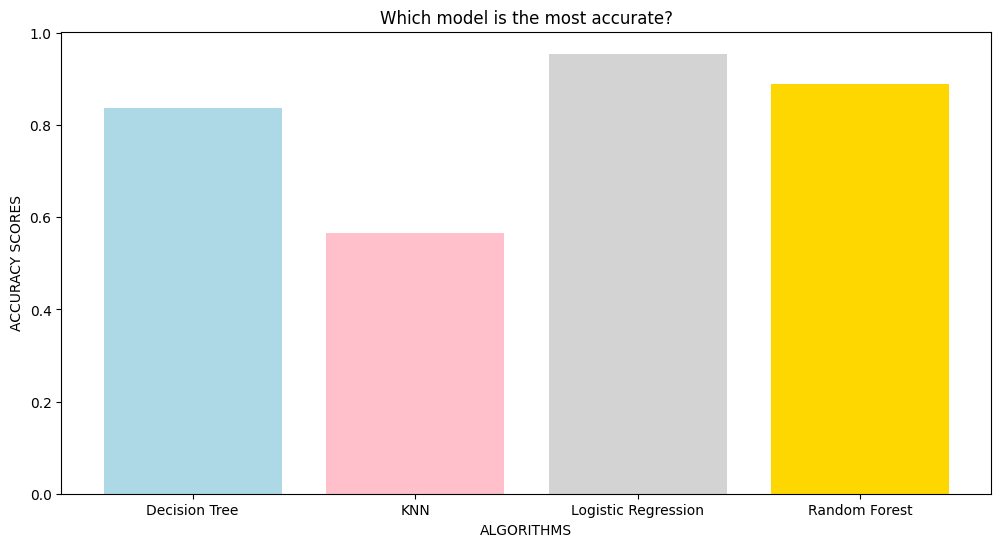

In [155]:
plt.figure(figsize = (12,6))
label = ['Decision Tree', 'KNN','Logistic Regression', 'Random Forest']
acc_score = [DT_ACCRY,KNN_ACCRY,LR_ACCRY,accuracy]

plt.bar(label,acc_score, color=['lightblue', 'pink', 'lightgrey','gold'])
plt.title('Which model is the most accurate?')
plt.xlabel('ALGORITHMS')
plt.ylabel('ACCURACY SCORES')
plt.show()

#Based on the comparison of different algorithms for mobile phone price prediction, it can be concluded that logistic regression achieves the highest accuracy among the tested models. Finally, K-Nearest Neighbors (K-NN) demonstrates the lowest accuracy among the considered algorithms.

# Predicting the Real Time Analysis of the price

In [156]:
print('Choosing some sort of features to predict the price')
print('\n')
for i in ['battery_power', 'blue','fc', 'four_g', 'int_memory',
       'mobile_wt', 'pc', 'ram']:
  print(i+':')
  print(train_data[i].unique())
  print("*************************************************************************************************************************")
  print("*************************************************************************************************************************")

Choosing some sort of features to predict the price


battery_power:
[ 842 1021  563 ... 1139 1467  858]
*************************************************************************************************************************
*************************************************************************************************************************
blue:
[0 1]
*************************************************************************************************************************
*************************************************************************************************************************
fc:
[ 1  0  2 13  3  4  5  7 11 12 16  6 15  8  9 10 18 17 14 19]
*************************************************************************************************************************
*************************************************************************************************************************
four_g:
[0 1]
***********************************************************************

In [157]:
selected_features=train_data.drop(['clock_speed','dual_sim','m_dep','n_cores','px_height','px_width','sc_h','sc_w','price_range'],axis=1)
y=train_data['price_range']
x_tr,x_te,y_tr,y_te=train_test_split(selected_features,y,test_size=0.1, random_state=4)

In [158]:
index=int(input())
if index < len(selected_features):
    row = selected_features.iloc[index]
    print((row))

10
battery_power     769
blue                1
fc                  0
four_g              0
int_memory          9
mobile_wt         182
pc                  1
ram              3946
Name: 10, dtype: int64


In [159]:
# Modelling and predicting price using Decision Tree Algorithm.
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_tr, y_tr)

DecisionTreeClassifier()

In [160]:
index=int(input("Enter any index position to predict the price for the features: "))
print("\n")
if index < len(selected_features):
    row = selected_features.iloc[index]
    print(dict(row),"\n")
    input_row = pd.DataFrame([row])
    prediction = dt.predict(input_row)
    pre = prediction[0]*10000
    print('Predicted price range of the Mobile is:',pre-2500,'-',pre+2500)
else:
  print("Index value sholud be in between 0 to 2000")

Enter any index position to predict the price for the features: 10


{'battery_power': 769, 'blue': 1, 'fc': 0, 'four_g': 0, 'int_memory': 9, 'mobile_wt': 182, 'pc': 1, 'ram': 3946} 

Predicted price range of the Mobile is: 27500 - 32500


In [161]:
# Creating a new dataset frame for the predicted price range data.
predicted_price=[pre-2500,pre+2500]
predicted_df = pd.DataFrame({'predicted_price_range':predicted_price})
predicted_df

,predicted_price_range
0,27500
1,32500
